In [311]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [312]:
current_wd = 'C:/Users/gabriele.a/Documents/Git Repository/Manifesto_Project/'
file_name = 'documents_MPDataset_MPDS2018b.xlsx'
file_path = current_wd +  file_name 


df_info_party = pd.read_excel(file_path)

In [313]:
df_info_party.head(12)

,country,countryname,party,partyname,date,title
0,11,Sweden,11110,Green Ecology Party,198809,Valmanifest
1,11,Sweden,11110,Green Ecology Party,199109,Valmanifest ‘91
2,11,Sweden,11110,Green Ecology Party,199409,Valmanifest
3,11,Sweden,11110,Green Ecology Party,199809,Valmanifest 98
4,11,Sweden,11110,Green Ecology Party,200209,Grönt Valmanifest 2002. För en långsiktigt hål...
5,11,Sweden,11110,Green Ecology Party,200609,Valmanifest 2006. Grönare Sverige! – för ökad ...
6,11,Sweden,11110,Green Ecology Party,201009,Framtiden är här - valmanifest för en grön om...
7,11,Sweden,11110,Green Ecology Party,201409,Valmanifest. Dags för en varmare politik!
8,11,Sweden,11220,Communist Party of Sweden,194409,Vad kommunisterna inte fick saga i radio
9,11,Sweden,11220,Communist Party of Sweden,194809,Valmanifest


In [314]:
file_name = 'MPDataset_MPDS2018b.xlsx'
file_path = current_wd +  file_name 

df_MPD2018b = pd.read_excel(file_path)

In [315]:
df_MPD2018b.head(4)

,country,countryname,oecdmember,eumember,edate,date,party,partyname,partyabbrev,parfam,...,per608_3,per703_1,per703_2,rile,planeco,markeco,welfare,intpeace,datasetversion,id_perm
0,11,Sweden,0,0,1944-09-17,194409,11220,Communist Party of Sweden,SKP,20,...,NaN,NaN,NaN,9.6,1.9,1.9,0.0,1.9,2018b,JN1LZH
1,11,Sweden,0,0,1944-09-17,194409,11320,Social Democratic Labour Party,SAP,30,...,NaN,NaN,NaN,-37.8,3.3,2.2,33.4,5.6,2018b,CMR7F6
2,11,Sweden,0,0,1944-09-17,194409,11420,People’s Party,FP,40,...,NaN,NaN,NaN,9.5,3.2,6.4,14.3,1.6,2018b,Z6OL6C
3,11,Sweden,0,0,1944-09-17,194409,11620,Right Party,NaN,60,...,NaN,NaN,NaN,28.0,1.8,22.8,10.6,0.0,2018b,YMKVN2


In [316]:
df_MPD2018b = df_MPD2018b.merge(df_info_party[["party","title"]], how='left',
                                left_on="party",
                                right_on="party")

In [317]:
list_col = list(df_MPD2018b.columns)
 
category1_policy_domains = [i for i in list_col if i.startswith('per1')]
category2_policy_domains = [i for i in list_col if i.startswith('per2')]
category3_policy_domains = [i for i in list_col if i.startswith('per3')]
category4_policy_domains = [i for i in list_col if i.startswith('per4')]
category5_policy_domains = [i for i in list_col if i.startswith('per5')]
category6_policy_domains = [i for i in list_col if i.startswith('per6')]
category7_policy_domains = [i for i in list_col if i.startswith('per7')]


### Create a subset that only includes 501, 416.1 and 416.2

In [318]:
sub_set_col = ['country', 'countryname', 'oecdmember', 'eumember', 'edate', 'date', 'party', 'partyname',
 'partyabbrev', 'parfam', 'coderid', 'manual', 'coderyear', 'testresult', 'testeditsim', 'pervote',
 'voteest', 'presvote', 'absseat', 'totseats', 'progtype', 'datasetorigin', 'corpusversion',
 'total', 'peruncod','per501', 'per416_1', 'per416_2', 'rile', 'planeco', 'markeco', 'welfare', 'intpeace',
 'datasetversion', 'id_perm', 'title']

In [319]:
df_sub_set = df_MPD2018b[sub_set_col]

df_sub_set.head(2)


,country,countryname,oecdmember,eumember,edate,date,party,partyname,partyabbrev,parfam,...,per416_1,per416_2,rile,planeco,markeco,welfare,intpeace,datasetversion,id_perm,title
0,11,Sweden,0,0,1944-09-17,194409,11220,Communist Party of Sweden,SKP,20,...,NaN,NaN,9.6,1.9,1.9,0.0,1.9,2018b,JN1LZH,Vad kommunisterna inte fick saga i radio
1,11,Sweden,0,0,1944-09-17,194409,11220,Communist Party of Sweden,SKP,20,...,NaN,NaN,9.6,1.9,1.9,0.0,1.9,2018b,JN1LZH,Valmanifest


### Create a new classification function of the Europe localiazation

#### Establish a dictionary with nations and belogning

According to: 

Geography: Realms, Regions, and Concepts has been published since 1971 and now in its 17th edition

In [326]:
list_country_names = list(df_sub_set['countryname'].drop_duplicates())
print('All countries in Manifesto_Project: ',list_country_names)

df_sub_set = df_sub_set.loc[df_sub_set['countryname'].isin(['Sweden', 'Norway', 'Denmark', 'Finland', 'Iceland', 'Belgium', 'Netherlands',
                                               'Luxembourg', 'France', 'Italy', 'Spain', 'Greece', 'Portugal', 'Germany', 'Austria',
                                               'Switzerland', 'United Kingdom', 'Northern Ireland', 'Ireland', 'Malta', 'Cyprus',
                                               'Israel', 'Sri Lanka', 'Turkey', 'Albania', 'Armenia', 'Azerbaijan', 'Belarus',
                                               'Bosnia-Herzegovina', 'Bulgaria', 'Croatia', 'Czech Republic', 'Estonia', 'Georgia',
                                               'German Democratic Republic', 'Hungary', 'Latvia', 'Lithuania', 'Macedonia', 'Moldova',
                                               'Montenegro','Poland', 'Romania', 'Russia', 'Serbia', 'Slovakia', 'Slovenia', 'Ukraine']),:]

list_country_names = list(df_sub_set['countryname'].drop_duplicates())
print('Countries in Selected for Current Project: ',list_country_names)

All countries in Manifesto_Project:  ['Sweden', 'Norway', 'Denmark', 'Finland', 'Iceland', 'Belgium', 'Netherlands', 'Luxembourg', 'France', 'Italy', 'Spain', 'Greece', 'Portugal', 'Germany', 'Austria', 'Switzerland', 'United Kingdom', 'Northern Ireland', 'Ireland', 'Malta', 'Cyprus', 'United States', 'Canada', 'Australia', 'New Zealand', 'Japan', 'Israel', 'Sri Lanka', 'Turkey', 'Albania', 'Armenia', 'Azerbaijan', 'Belarus', 'Bosnia-Herzegovina', 'Bulgaria', 'Croatia', 'Czech Republic', 'Estonia', 'Georgia', 'German Democratic Republic', 'Hungary', 'Latvia', 'Lithuania', 'Macedonia', 'Moldova', 'Montenegro', 'Poland', 'Romania', 'Russia', 'Serbia', 'Slovakia', 'Slovenia', 'Ukraine', 'South Korea', 'Mexico', 'South Africa']
Countries in Selected for Current Project:  ['Sweden', 'Norway', 'Denmark', 'Finland', 'Iceland', 'Belgium', 'Netherlands', 'Luxembourg', 'France', 'Italy', 'Spain', 'Greece', 'Portugal', 'Germany', 'Austria', 'Switzerland', 'United Kingdom', 'Northern Ireland', 'Ir

In [327]:
import shapefile

current_wd = 'C:/Users/gabriele.a/Documents/Git Repository/Manifesto_Project/'

myshp = open(current_wd+'/ne_110m_coastline.shp', "rb")
mydbf = open(current_wd+'/ne_110m_coastline.dbf', "rb")

shape = shapefile.Reader(shp=myshp, dbf=mydbf)

records = shape.records()
shapes = shape.shapes()

print(shape.shapeType)
print(shape.fields)

#first feature of the shapefile
feature = shape.shapeRecords()[0]

print(feature) # (GeoJSON format){'type': 'LineString', 'coordinates': ((0.0, 0.0), (25.0, 10.0), (50.0, 50.0))}

3
[('DeletionFlag', 'C', 1, 0), ['scalerank', 'N', 10, 0], ['featurecla', 'C', 12, 0], ['min_zoom', 'N', 4, 1]]


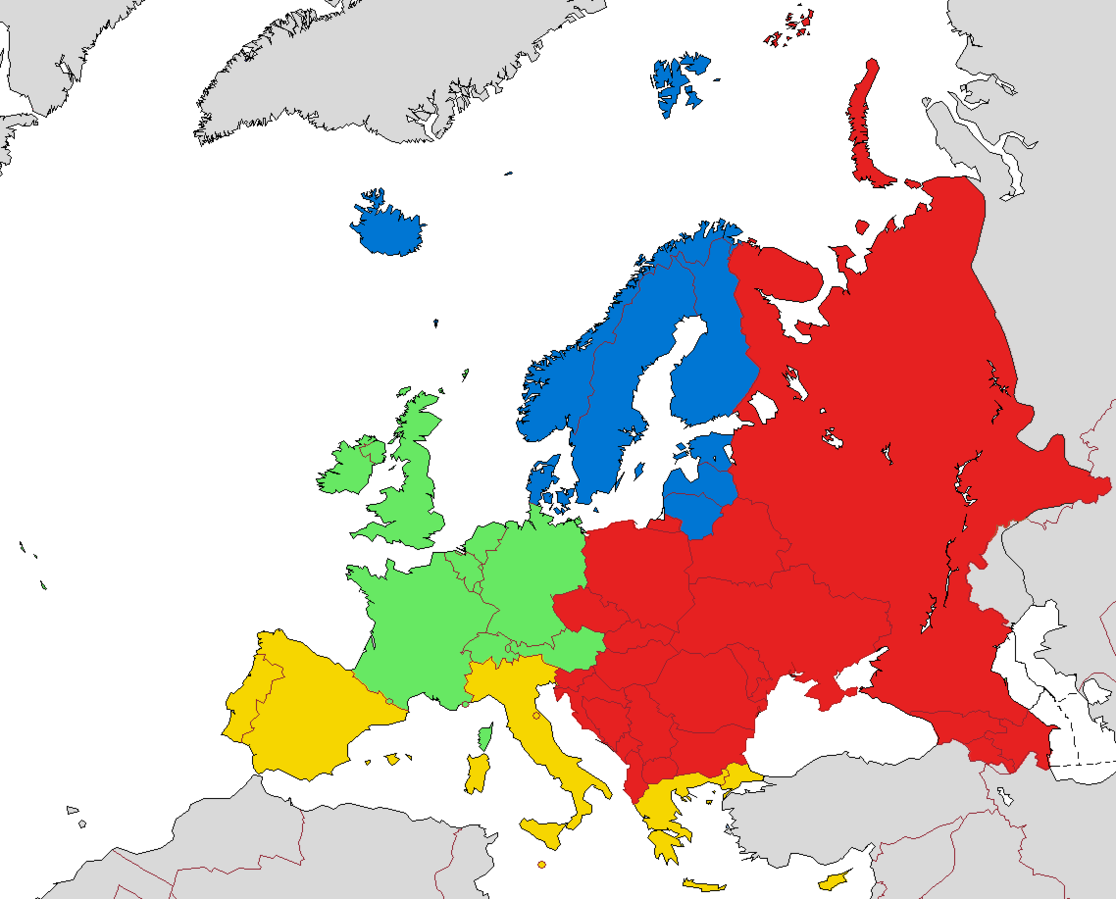

In [16]:
from IPython.display import Image

PATH = "img/" 


Image(filename = PATH + "European_sub-regions_according_to_EuroVoc_the_thesaurus_of_the_EU.png",
      width=600, height= 600)

In [17]:
print("Blue - Northern Europe")
print("Green - Western Europe.")
print("Red - Central and Eastern Europe.")
print("Yellow - Southern Europe.")
print("Grey - Territories not considered part of Europe.")

Blue - Northern Europe
Green - Western Europe.
Red - Central and Eastern Europe.
Yellow - Southern Europe.
Grey - Territories not considered part of Europe.


In [345]:
Nation_dic_2 = {'West_europe': ['Sweden','Denmark','Finland','Belgium','Netherlands','Luxembourg',
                                'France','Italy','Spain','Greece','Portugal','Germany','Austria',
                                'United Kingdom','Ireland','Norway','Malta','Switzerland'],
                
                'East_europe': ['Bulgaria','Croatia','Czech Republic','Estonia','Hungary','Latvia',
                                'Lithuania','Poland','Romania','Slovakia','Slovenia','Albania','Armenia','Azerbaijan','Belarus','Bosnia-Herzegovina','Bosnia and Herzegovina','Bulgaria','Czech Republic',
                                 'Croatia','Georgia','Hungary','Moldova','Montenegro','North Macedonia','Republic of Macedonia',
                                'Poland','Romania','Russia','Serbia','Slovakia','Slovenia','Ukraine','Kosovo']}
                                
Nation_dic = {'West_europe':   ['Andorra','Austria','Belgium','France','Germany','Ireland', 'Liechtenstein',
                                'Luxembourg','Monaco','Netherlands','Switzerland','United Kingdom','German Democratic Republic'],
              
              'East_europe':   [ 'Albania','Armenia','Azerbaijan','Belarus','Bosnia-Herzegovina','Bosnia and Herzegovina','Bulgaria','Czech Republic',
                                 'Croatia','Georgia','Hungary','Moldova','Montenegro','North Macedonia','Republic of Macedonia',
                                'Poland','Romania','Russia','Serbia','Slovakia','Slovenia','Ukraine','Kosovo'],
              
              'South_europe':  [ 'Cyprus','Greece','Italy','Malta','Portugal','San Marino','Spain'],
              
              'Northen_europe':[ 'Denmark','Estonia','Finland','Iceland','Latvia','Lithuania','Norway','Sweden']}


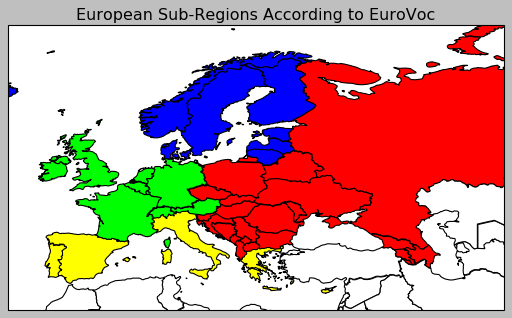

In [346]:
import cartopy.io.shapereader as shpreader
import cartopy.crs as ccrs
import cartopy

shapename = 'admin_0_countries'

countries_shp = shpreader.natural_earth(resolution='50m',
                                        category='cultural', name=shapename)

#country = shpreader.Reader(countries_shp).records()
reader = shpreader.Reader(countries_shp)
countries = reader.records()
country = next(countries)

fig = plt.figure() #subplots(2, 2, sharex=False, sharey=False)

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

#fig.suptitle('Horizontally stacked subplots')
#fig.suptitle('Split by European SubRegions - {}'.format('2018'), fontsize=15, y=.95)


ax1 = plt.axes(projection=ccrs.PlateCarree())
#axs[0,0].subplot(2,1,1)
ax1.set_extent([-15, 60, 32, 72])
ax1.set_title('European Sub-Regions According to EuroVoc')



yellow = (1, 1, 0)
cyan = (0, 1, 1)
red = (1, 0, 0)
green = (0, 1, 0)
blue = (0, 0, 1)
white = (1, 1, 1)



for country in countries:
    #print(country.attributes['NAME_EN'])
    if country.attributes['NAME_EN'] in Nation_dic['West_europe']:
        #print(country)    
        ax1.add_geometries(country.geometry, ccrs.PlateCarree(),
                          facecolor=green,
                          label=country.attributes['ADM0_A3'])
        
    elif country.attributes['NAME_EN'] in Nation_dic['East_europe']:
        #print(country)    
        ax1.add_geometries(country.geometry, ccrs.PlateCarree(),
                          facecolor=red,
                          label=country.attributes['ADM0_A3'])    
    
    elif country.attributes['NAME_EN'] in Nation_dic['South_europe']:
        #print(country)    
        ax1.add_geometries(country.geometry, ccrs.PlateCarree(),
                          facecolor=yellow,
                          label=country.attributes['ADM0_A3'])    
    
    elif country.attributes['NAME_EN'] in Nation_dic['Northen_europe']:
        #print(country)    
        ax1.add_geometries(country.geometry, ccrs.PlateCarree(),
                          facecolor=blue,
                          label=country.attributes['ADM0_A3'])    
    
    else:
        ax1.add_geometries(country.geometry, ccrs.PlateCarree(),
                          facecolor=(1, 1, 1),
                          label=country.attributes['ADM0_A3'])



plt.show()            


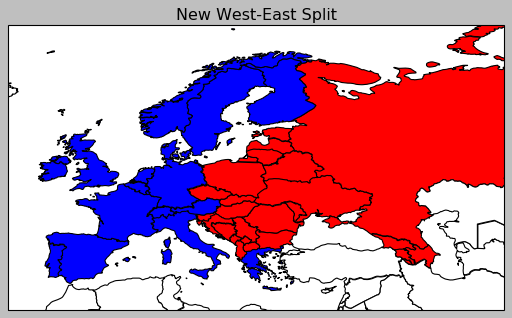

In [348]:
import cartopy.io.shapereader as shpreader
import cartopy.crs as ccrs
import cartopy

shapename = 'admin_0_countries'

countries_shp = shpreader.natural_earth(resolution='50m',
                                        category='cultural', name=shapename)

reader = shpreader.Reader(countries_shp)
countries = reader.records()
country = next(countries)

fig1 = plt.figure() #subplots(2, 2, sharex=False, sharey=False)

ax1 = fig1.add_subplot()

#fig1.suptitle('Horizontally stacked subplots')
#fig1.suptitle('Split by European SubRegions - {}'.format('2018'), fontsize=15, y=.95)


ax1 = plt.axes(projection=ccrs.PlateCarree())
ax1.set_extent([-15, 60, 32, 72])
ax1.set_title('New West-East Split')


for country in countries:
    if country.attributes['NAME_EN'] in Nation_dic_2['West_europe']:
        ax1.add_geometries(country.geometry, ccrs.PlateCarree(),
                          facecolor=blue,
                          label=country.attributes['ADM0_A3'])
        
    elif country.attributes['NAME_EN'] in Nation_dic_2['East_europe']:
        ax1.add_geometries(country.geometry, ccrs.PlateCarree(),
                          facecolor=red,
                          label=country.attributes['ADM0_A3'])    
    
    else:
        ax1.add_geometries(country.geometry, ccrs.PlateCarree(),
                          facecolor=(1, 1, 1),
                          label=country.attributes['ADM0_A3'])        
        
#fig1.subplots_adjust(hspace=0.3)

plt.show()  

In [349]:
Nation_dic['South_europe']
df_sub_set.loc[df_sub_set['countryname'].isin(Nation_dic['South_europe']),'European_Region_Euro_Voc'] = 'South_europe'  
df_sub_set.loc[df_sub_set['countryname'].isin(Nation_dic['West_europe']),'European_Region_Euro_Voc'] = 'West_europe'  
df_sub_set.loc[df_sub_set['countryname'].isin(Nation_dic['East_europe']),'European_Region_Euro_Voc'] = 'East_europe'  
df_sub_set.loc[df_sub_set['countryname'].isin(Nation_dic['Northen_europe']),'European_Region_Euro_Voc'] = 'Northen_europe'

Nation_dic_2['West_europe']
df_sub_set.loc[df_sub_set['countryname'].isin(Nation_dic_2['West_europe']),'European_Region_Est_West'] = 'Western_Europe'  
df_sub_set.loc[df_sub_set['countryname'].isin(Nation_dic_2['East_europe']),'European_Region_Est_West'] = 'Eastern_Europe'  

#df_sub_set.loc[df_sub_set.countryname.isna()),:]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


### Political affiliation based on party name
Dictionnary based on 

ADAMS J., CLARK M., EZROW L. and GLASGOW G., 2006, ‘Understanding change and stability in party ideologies: do parties respond to public opinion or to past election results?’, British Journal of Political Science, 34 (4), 589–610.

HELLWIG T., 2012, ‘Constructing accountability party position taking and economic voting’, Comparative Political Studies, 45 (1), 91–118


In [21]:
Party_dic = {'Left_wing': ['ecology','labor','environment','socialist','democratic',
                           'ecologist',  'communist','communists','green','democrat','democrat',
                           'social democratic', 'left', 'labour','people','christian democratic','democratic'],
             
             'Right_wing':['nationalist','liberal','liberals','national',
                           'conservative', 'christian democratic parties',
                           'right'],
             'Other': []
             }



In [22]:
df_sub_set['partyname'] = df_sub_set['partyname'].str.lower()
# print(df_sub_set['partyname'].drop_duplicates())

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
for affiliation, all_words in Party_dic.items():
    for word in all_words:
        #print(word)
        df_sub_set.loc[df_sub_set['partyname'].str.contains(word, regex=False),'political_affiliation'] = affiliation



In [24]:
df_sub_set['political_affiliation'].fillna(value='Other', inplace = True)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [25]:

df_sub_set.political_affiliation.count()

46234

In [26]:
df_sub_set_idx = df_sub_set.set_index('edate')


df_sub_set_idx['Any_Env'] = 0

values = {'per501':0, 'per416_1': 0, 'per416_2': 0, 'Any_Env': 0}

df_sub_set_idx = df_sub_set_idx.fillna(value=values)


df_sub_set_idx['Any_Env'] = df_sub_set_idx['per501'] + df_sub_set_idx['per416_1']+df_sub_set_idx['per416_2']


#df_sub_set.to_csv('test.csv')


## Political affiliation based on party classification from `parl-gov`

#### Loading the Party affiliation file from Parl-gov

In [27]:
file_name = 'parlgov-stable.xlsx'
file_path_parl_gov = current_wd + file_name
parl_gov = pd.read_excel(file_path_parl_gov, sheet_name=0,header=0)

# parl_gov.loc[parl_gov['country_name_short'] == 'ITA',['party_name_english','party_name']]

### Simple Merge between Party Manifesto and Political Orientation from Parl Gov only based on PartyName and Party Abbrv.
This Join will only work if the spelling of the party is exactly the same.


In [28]:
#df_sub_set.head()
parl_gov.head()

m_p_parlgov_complete = pd.DataFrame()

m_p_parlgov_complete = pd.merge(df_sub_set, 
                                parl_gov, 
                                how = 'left', 
                                left_on=['countryname','partyabbrev'], 
                                right_on = ['country_name','party_name_short']) 


#### The function below called `split_missing_party` is used to separate data for which we know ParlGov

In [29]:
m_p_parlgov_complete

,country,countryname,oecdmember,eumember,edate,date,party,partyname,partyabbrev,parfam,...,euprofiler,ees,castles_mair,huber_inglehart,ray,benoit_laver,chess,country_id,party_id,family_id
0,11,Sweden,0,0,1944-09-17,194409,11220,communist party of sweden,SKP,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11,Sweden,0,0,1944-09-17,194409,11220,communist party of sweden,SKP,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11,Sweden,0,0,1944-09-17,194409,11220,communist party of sweden,SKP,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11,Sweden,0,0,1944-09-17,194409,11220,communist party of sweden,SKP,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11,Sweden,0,0,1944-09-17,194409,11220,communist party of sweden,SKP,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46229,181,South Africa,0,0,2014-05-07,201405,181420,congress of the people,COPE,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46230,181,South Africa,0,0,2014-05-07,201405,181910,inkatha freedom party,IFP,90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46231,181,South Africa,0,0,2014-05-07,201405,181910,inkatha freedom party,IFP,90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46232,181,South Africa,0,0,2014-05-07,201405,181910,inkatha freedom party,IFP,90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:

def split_missing_party(Complete_dataframe,colum_to_split_by):
    Complete_dataframe_found = Complete_dataframe.dropna(subset = [colum_to_split_by] )
    Complete_dataframe_missing = Complete_dataframe[Complete_dataframe[colum_to_split_by].isnull()]
    
    print(len(Complete_dataframe_missing)/len(Complete_dataframe)*100, '% missing rows')
    
    return Complete_dataframe_found, Complete_dataframe_missing 

m_p_parlgov_complete, missing = split_missing_party(m_p_parlgov_complete,'country_name_short')

df_sub_set_for_names = missing[list(df_sub_set.columns)]

52.82043517757494 % missing rows


In [32]:
print('The Simple merge is only accurate to:')
print( 'percent of entries with simple merge: ',len(m_p_parlgov_complete)/(len(m_p_parlgov_complete)+len(missing))*100, '%')


The Simple merge is only accurate to:
percent of entries with simple merge:  47.17956482242506 %


For Each country we are going to try to find the closest match on multiple columns
The function below is slicing by country and after is applying the similarity by row to: 
- `party name in original language`
- `party name in english`
- `party abbreviation`

### The algorithm below leverages the `difflib` module to find close match between items in columns.
We are going to use this funciton iteratively on 2 columns. First the party name in english that were not yet matched by the direct merge and than on the Party Abbreviation

In [ ]:
import difflib
difflib.get_close_matches

slice_df1 ='countryname'
match_df1 = 'partyname'
slice_df2 = 'country_name'
match_df2 = 'party_name_english'

country_list = list(df_sub_set_for_names[slice_df1].drop_duplicates())
country = country_list[3]



merged_party_parlgov = pd.DataFrame()


for country in country_list:
        
    df1 = df_sub_set_for_names.loc[df_sub_set_for_names[slice_df1] == country,:]
    df2 = parl_gov.loc[parl_gov[slice_df2] == country,[slice_df2,match_df2]]

    df1.reset_index(drop=True, inplace = True)
    df2.reset_index(drop=True, inplace = True)



    df2['party_name_parlgov'] = df2[match_df2].apply(lambda x: difflib.get_close_matches(x,
                                                                      df1[match_df1],
                                                                      n=1,
                                                                      cutoff = 0.70))

    merged_party_parlgov = merged_party_parlgov.append(df2)

print(merged_party_parlgov.head(10))


    
    
    

In [ ]:
merged_party_parlgov['party_name_parlgov'] = merged_party_parlgov['party_name_parlgov'].apply(''.join)


In [ ]:

#m_p_parlgov_complete = pd.DataFrame()

for country in country_list:
    
    df_sub_set_country = df_sub_set_for_names.loc[df_sub_set_for_names['countryname'] == country]
    
    m_p_parlgov_country = merged_party_parlgov.loc[merged_party_parlgov['country_name'] == country]
    
    parl_gov_country = parl_gov.loc[parl_gov['country_name'] == country]
    

                            
    m_p_parlgov_country_complete = pd.merge(df_sub_set_country,
                                            m_p_parlgov_country, 
                                            how = 'left', 
                                            left_on='partyname',
                                            right_on='party_name_parlgov')
  
    m_p_parlgov_country_complete = pd.merge(m_p_parlgov_country_complete,
                                         parl_gov_country,
                                         how = 'left',
                                         left_on = 'party_name_english',
                                         right_on = 'party_name_english')
                                                                    
    m_p_parlgov_complete = m_p_parlgov_complete.append(m_p_parlgov_country_complete)



### Now we will separate once more the missing and apply the similarity on the Party Abbreviation

In [ ]:
m_p_parlgov_complete, missing = split_missing_party(m_p_parlgov_complete,'country_name_short')

df_sub_set_for_party_abbv = missing.loc[:,list(df_sub_set.columns)]

print(df_sub_set_for_party_abbv)

In [ ]:
import difflib
difflib.get_close_matches

slice_df1 ='countryname'
match_df1 = 'partyabbrev'
slice_df2 = 'country_name'
match_df2 = 'party_name_short'

country_list = list(df_sub_set_for_party_abbv[slice_df1].drop_duplicates())
country = country_list[3]



merged_party_parlgov = pd.DataFrame()



for country in country_list:
    df1=pd.DataFrame()
    df2=pd.DataFrame()

    df1 = df_sub_set_for_party_abbv.loc[df_sub_set_for_party_abbv[slice_df1] == country,:]
    df2 = parl_gov.loc[parl_gov[slice_df2] == country,[slice_df2,match_df2]]


    df1.reset_index(drop=True, inplace = True)
    df2.reset_index(drop=True, inplace = True)

    df1.dropna(subset=[match_df1], inplace = True)

    df2['party_name_parlgov'] = df2[match_df2].apply(lambda x: difflib.get_close_matches(x,
                                                                      df1[match_df1],
                                                                      n=1,
                                                                      cutoff = 0.70))

    merged_party_parlgov = merged_party_parlgov.append(df2)

print(merged_party_parlgov.head(40))


    
    
    

In [ ]:
merged_party_parlgov['party_name_parlgov'] = merged_party_parlgov['party_name_parlgov'].apply(''.join)
print(merged_party_parlgov.head(10))


In [ ]:

#m_p_parlgov_complete = pd.DataFrame()

for country in country_list:
    
    df_sub_set_country = df_sub_set_for_party_abbv.loc[df_sub_set_for_party_abbv['countryname'] == country]
    
    m_p_parlgov_country = merged_party_parlgov.loc[merged_party_parlgov['country_name'] == country]
    
    parl_gov_country = parl_gov.loc[parl_gov['country_name'] == country]
    

                            
    m_p_parlgov_country_complete = pd.merge(df_sub_set_country,
                                            m_p_parlgov_country, 
                                            how = 'left', 
                                            left_on='partyabbrev',
                                            right_on='party_name_parlgov')
  
    m_p_parlgov_country_complete = pd.merge(m_p_parlgov_country_complete,
                                         parl_gov_country,
                                         how = 'left',
                                         left_on = 'party_name_short',
                                         right_on = 'party_name_short')
                                                                    
    m_p_parlgov_complete = m_p_parlgov_complete.append(m_p_parlgov_country_complete)



In [ ]:
found, missing = split_missing_party(m_p_parlgov_complete,'country_name_short')

### We finally managed to merge 80% of the ParlGov data to the Election Data
We have now 3 targets to model
- `Per_501`:
- `Per_416_2`:
- `Per_416_1`:

Against 10 different Features:
- `eu_anti_pro`	
- `euprofiler`
- `intpeace`
- `left_right` 
- `liberty_authority`
- `markeco`	
- `huber_inglehart`	
- `welfare`	
- `castles_mair`
- `benoit_laver`

### We are going to check if any of the features we have are correlated. This is aimed at removing the Collinearity and reducing the Variability Inflation Factor

In [ ]:
X = found[['eu_anti_pro','euprofiler','intpeace','left_right','liberty_authority','markeco',
       'huber_inglehart','welfare','castles_mair','benoit_laver']]

pd.plotting.scatter_matrix(X, figsize=(12, 12))
plt.show()

#### The Features that are correlated are:
- `euprofiler`
- `huber_inglehart`
- `castles_mair`
- `benoit_laver`
- `left_right`

In [ ]:
X = found[['left_right','liberty_authority','huber_inglehart','castles_mair','benoit_laver','edate']]

pd.plotting.scatter_matrix(X, figsize=(12, 12))
plt.show()


## Modeling and Data Analytics
In the following section we will understand the effect of the 10 Features we have above on the `Per_501` / `Per_416_1` and `Per_416_2`



### Features Selection 
Out of the columns available we need to make a choice on the ones we can retain. Certain columns are function of others and cannot be modeled.

In [ ]:
col, corr  = Correlation_Estimation(X, Corr_Lim = 0.71, plot_heatmap = True)
print(col)
print(corr)

In [ ]:
X = found[['eu_anti_pro','euprofiler','intpeace','left_right','liberty_authority','markeco',
       'huber_inglehart','welfare','castles_mair','benoit_laver']]

col, corr  = Correlation_Estimation(X, Corr_Lim = 0.71, plot_heatmap = True)
print(col)


In [1]:
col = list(col)
col.append('edate')
print(col)


NameError: name 'col' is not defined

In [349]:

X = found[found.columns.intersection(col)]

Y_per501 = found.per501
Y_per416_1 = found.per416_1
Y_per416_2 = found.per416_2

### Linear Regression Modeling 
This section we will look into modeling of relative impact of the Features in X, on the outputs Y_per501 / Y_per416_1 / Y_per416_2

In [369]:
import numpy as np
from sklearn.linear_model import ElasticNetCV

In [ ]:
model = ElasticNetCV(fit_intercept=True,
                     l1_ratio=0.5, 
                     max_iter=1000, 
                     n_alphas = 1000,
                     n_jobs=None, 
                     normalize=True,
                     cv=5, 
                     random_state=0)

print(len(Y_per501))

data = pd.concat([Y_per501,X], axis=1)

data.head(50)

data.dropna(inplace = True)


print(len(data))

model.fit(data[X.columns], data.per501)

r_sq = model.score(data[X.columns], data.per501)

print('Score R-srq : ',r_sq)

42800
17514


In [303]:
def backwardElimination(x_pandas, Y_pandas, sl):
    
    columns = x_pandas.columns

    x = x_pandas.iloc[:,0:].values
    Y = Y_pandas.iloc[:,0].values
    
    numVars = len(columns)
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()

    data = x_pandas[columns]
    
    return data, regressor_OLS

def Correlation_Estimation(x, Corr_Lim = 0.65, plot_heatmap = False):

    corr = x.corr(method='spearman')
    if plot_heatmap == True:
        from seaborn import heatmap
        heatmap(corr)

    columns = np.full((corr.shape[0],), True, dtype=bool)
    for i in range(corr.shape[0]):
        for j in range(i+1, corr.shape[0]):
            if corr.iloc[i,j] >= Corr_Lim:
                if columns[j]:
                    columns[j] = False
                
    selected_columns = x.columns[columns]

    return selected_columns, corr;


def plot_f_p_Values(x,y):
    from sklearn.feature_selection import f_regression
    from numpy import arange
    
    f, p = f_regression(x,y)

    list_col = np.array(x.columns)

    plt.figure(figsize=(4,4))

    ax = plt.subplot(1,2,1)
    ax.set_title("p-values", fontsize = 23)
    ax = plt.axvline(x=0.015)
    ax = plt.barh(arange(len(p)),p, align='center', alpha=0.5)
    plt.yticks(arange(len(p)), list_col)

    ax = plt.subplot(1,2,2)
    ax.set_title("f-values", fontsize = 23)
    plt.barh(arange(len(f)),f, align='center', alpha=0.5)
    plt.yticks(arange(len(f)), list_col)
  



In [102]:
a = merge_dataframes_by_col(df_sub_set,'countryname','partyname',parl_gov,'country_name','party_name_english', cutoff = 0.7)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [103]:
a.head(15)

,country_name,party_name_english,party_name_parlgov
0,Sweden,Centre Party,[]
1,Sweden,People's Party,[]
2,Sweden,Feminist Initiative,[]
3,Sweden,National Farmers' Union,[]
4,Sweden,June List,[]
5,Sweden,Christian Democrats,[]
6,Sweden,Moderate Party,[]
7,Sweden,Greens,[]
8,Sweden,Citizens Coalition,[]
9,Sweden,Middle Parties,[]


In [54]:
b = merge_dataframes_by_col(df_sub_set,'countryname','partyabbrev',parl_gov,'country_name','party_name_short', cutoff = 0.7)
b.head(10)

,country_name,party_name_english,party_name_parlgov
0,Sweden,Centre Party,[]
1,Sweden,People's Party,[]
2,Sweden,Feminist Initiative,[]
3,Sweden,National Farmers' Union,[]
4,Sweden,June List,[]
5,Sweden,Christian Democrats,[]
6,Sweden,Moderate Party,[]
7,Sweden,Greens,[]
8,Sweden,Citizens Coalition,[]
9,Sweden,Middle Parties,[]


In [73]:
b.index.names = ['index']
a.index.names = ['index']
b.head(10)
c = pd.merge(a,b, how='left', on='index')
c.drop

,country_name_x,party_name_english,party_name_parlgov_x,country_name_y,party_name_short,party_name_parlgov_y
index,,,,,,
0,Sweden,Centre Party,[centre party],Sweden,C,[]
1,Sweden,People's Party,[people’s party],Sweden,FP,[FP]
2,Sweden,Feminist Initiative,[],Sweden,Fi,[]
3,Sweden,National Farmers' Union,[],Sweden,JR,[]
4,Sweden,June List,[],Sweden,Jl,[]
5,Sweden,Christian Democrats,[christian democrats],Sweden,KD,[KDS]
6,Sweden,Moderate Party,[],Sweden,M,[]
7,Sweden,Greens,[],Sweden,MP,[MP]
8,Sweden,Citizens Coalition,[],Sweden,MbS,[]


In [130]:
difflib.get_close_matches?
merged_party_parlgov

,country_name,party_name_english,party_name_parlgov
0,Sweden,Centre Party,[centre party]
1,Sweden,People's Party,[people’s party]
2,Sweden,Feminist Initiative,[]
3,Sweden,National Farmers' Union,[]
4,Sweden,June List,[]
5,Sweden,Christian Democrats,[christian democrats]
6,Sweden,Moderate Party,[moderate coalition party]
7,Sweden,Greens,[]
8,Sweden,Citizens Coalition,[]
9,Sweden,Middle Parties,[]


In [107]:
#df_sub_set.head()
merged_party_parlgov.head(50)

,country_name,party_name_english,party_name_parlgov
0,Sweden,Centre Party,"[centre party, centre party, centre party]"
1,Sweden,People's Party,"[people’s party, people’s party, people’s party]"
2,Sweden,Feminist Initiative,[]
3,Sweden,National Farmers' Union,[]
4,Sweden,June List,[]
5,Sweden,Christian Democrats,"[christian democrats, christian democrats, chr..."
6,Sweden,Moderate Party,[]
7,Sweden,Greens,[]
8,Sweden,Citizens Coalition,[]
9,Sweden,Middle Parties,[]


In [104]:

for row in range(len(merged_party_parlgov)):
    
    if len(merged_party_parlgov['party_name_parlgov'][row]) > 0:
        merged_party_parlgov['party_name_parlgov'][row] = merged_party_parlgov['party_name_parlgov'][row][0]
    else: merged_party_parlgov['party_name_parlgov'][row] = np.NaN
    


In [26]:
# merged_party_parlgov.to_csv('party_affiliation.csv')    
  

In [105]:
merged_party_parlgov.head(15)

,country_name,party_name,party_name_parlgov
0,Sweden,Centerpartiet,NaN
1,Sweden,Folkpartiet,NaN
2,Sweden,Feministiskt initiativ,NaN
3,Sweden,Jordbrukarnas Riksförbund,NaN
4,Sweden,Junilistan,NaN
5,Sweden,Kristdemokraterna,NaN
6,Sweden,Moderaterna,NaN
7,Sweden,Miljöpartiet de Gröna,NaN
8,Sweden,Medborgerlig samling,NaN
9,Sweden,Mittenpartierna,NaN


In [32]:
#Merge all other info based on PartyName

m_p_parlgov_complete = pd.DataFrame()

for country in country_list:
    
    df_sub_set_country = df_sub_set.loc[df_sub_set['countryname'] == country]
    m_p_parlgov_country = merged_party_parlgov.loc[merged_party_parlgov['country_name'] == country]
    parl_gov_country = parl_gov.loc[parl_gov['country_name'] == country]
    

                            
    m_p_parlgov_country_complete = pd.merge(df_sub_set_country,
                                            m_p_parlgov_country, 
                                            how = 'left', 
                                            left_on='partyname',
                                            right_on='party_name_parlgov')
    
    
#    print(list(m_p_parlgov_country_complete.columns))
#    print(list(parl_gov_country.columns))
    m_p_parlgov_country_complete = pd.merge(m_p_parlgov_country_complete,
                                         parl_gov_country,
                                         how = 'left',
                                         left_on = 'party_name_english',
                                         right_on = 'party_name_english')
                                                                    
    m_p_parlgov_complete = m_p_parlgov_complete.append(m_p_parlgov_country_complete)

In [37]:
m_p_parlgov_complete

,country,countryname,oecdmember,eumember,edate,date,party,partyname,partyabbrev,parfam,...,euprofiler,ees,castles_mair,huber_inglehart,ray,benoit_laver,chess,country_id,party_id,family_id
0,11,Sweden,0,0,1944-09-17,194409,11220,communist party of sweden,SKP,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0,2475.0,14.0
1,11,Sweden,0,0,1944-09-17,194409,11320,social democratic labour party,SAP,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11,Sweden,0,0,1944-09-17,194409,11420,people’s party,FP,40,...,280.0,1752420.0,1503.0,3704.0,1604.0,7860.0,1604.0,35.0,892.0,6.0
3,11,Sweden,0,0,1944-09-17,194409,11620,right party,NaN,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11,Sweden,0,0,1944-09-17,194409,11810,agrarian party,NaN,80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,11,Sweden,0,0,1948-09-19,194809,11220,communist party of sweden,SKP,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0,2475.0,14.0
6,11,Sweden,0,0,1948-09-19,194809,11320,social democratic labour party,SAP,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,11,Sweden,0,0,1948-09-19,194809,11420,people’s party,FP,40,...,280.0,1752420.0,1503.0,3704.0,1604.0,7860.0,1604.0,35.0,892.0,6.0
8,11,Sweden,0,0,1948-09-19,194809,11620,right party,NaN,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,11,Sweden,0,0,1948-09-19,194809,11810,agrarian party,NaN,80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
m_p_parlgov_country.head()

NameError: name 'm_p_parlgov_country' is not defined

In [37]:
parl_gov.head(44)

#df_sub_set_country['partyname'].head(14)
#m_p_parlgov_country['party_name_english'].head(14)

#parl_gov.head()
#df_sub_set.head()
#m_p_parlgov_country.head()
#m_p_parlgov_country_complete.columns

,country_name_short,country_name,party_name_short,party_name_english,party_name,party_name_ascii,family_name_short,family_name,left_right,state_market,...,euprofiler,ees,castles_mair,huber_inglehart,ray,benoit_laver,chess,country_id,party_id,family_id
0,AUS,Australia,ACP-V,Australian Country Party (Vic),Australian Country Party (Vic),Australian Country Party (Vic),con,Conservative,7.4000,6.4000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33,1935,26
1,AUS,Australia,AD,Australian Democrats,Australian Democrats,Australian Democrats,soc,Social democracy,3.7004,3.3684,...,NaN,NaN,102.0,203.0,NaN,4703.0,NaN,33,120,11
2,AUS,Australia,AG,Australian Greens,Australian Greens,Australian Greens,eco,Green/Ecologist,1.5439,1.2982,...,NaN,NaN,NaN,NaN,NaN,4739.0,NaN,33,751,19
3,AUS,Australia,ALP,Australian Labor Party,Australian Labor Party,Australian Labor Party,soc,Social democracy,3.8833,4.0351,...,NaN,NaN,101.0,NaN,NaN,4721.0,NaN,33,1253,11
4,AUS,Australia,AP,Australia Party,Australia Party,Australia Party,lib,Liberal,6.0000,6.7000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33,1760,6
5,AUS,Australia,C,Coalition,Coalition,Coalition,con,Conservative,7.4000,6.4000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33,1428,26
6,AUS,Australia,CDP,Christian Democratic Party,Christian Democratic Party,Christian Democratic Party,chr,Christian democracy,6.2000,5.7000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33,1650,3
7,AUS,Australia,CLP,Commonwealth Liberal Party,Commonwealth Liberal Party,Commonwealth Liberal Party,con,Conservative,7.4000,6.4000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33,2285,26
8,AUS,Australia,CN-QLD,Country-National Party (Qld),Country-National Party (Qld),Country-National Party (Qld),con,Conservative,7.4000,6.4000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33,1933,26
9,AUS,Australia,CPA,Communist Party of Australia,Communist Party of Australia,Communist Party of Australia,com,Communist/Socialist,1.2000,1.4000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33,1922,14


In [41]:
print(m_p_parlgov_complete.head(5))
m_p_parlgov_complete.to_csv('merged_party_parlgov_complete.csv')

   country countryname  oecdmember  eumember      edate    date  party  \
0       11      Sweden           0         0 1944-09-17  194409  11220   
1       11      Sweden           0         0 1944-09-17  194409  11320   
2       11      Sweden           0         0 1944-09-17  194409  11420   
3       11      Sweden           0         0 1944-09-17  194409  11620   
4       11      Sweden           0         0 1944-09-17  194409  11810   

                        partyname partyabbrev  parfam  ...  euprofiler  \
0       communist party of sweden         SKP      20  ...         NaN   
1  social democratic labour party         SAP      30  ...         NaN   
2                  people’s party          FP      40  ...       280.0   
3                     right party         NaN      60  ...         NaN   
4                  agrarian party         NaN      80  ...         NaN   

         ees  castles_mair  huber_inglehart     ray  benoit_laver   chess  \
0        NaN           NaN       

# Continue from here

In [35]:
print(len(m_p_parlgov_complete))
print(len(m_p_parlgov_complete.dropna()))

4801
0


In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn


### Environmental protection discour in Europe

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


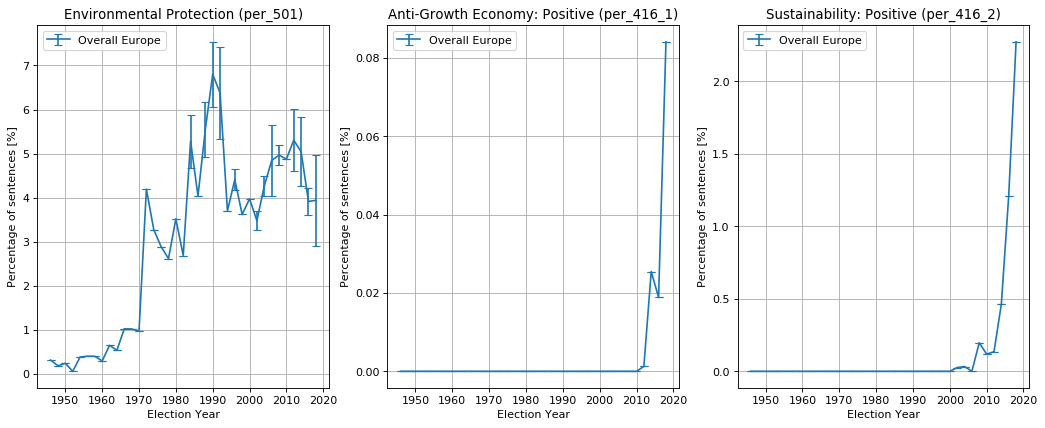

In [37]:

#pd.DataFrame.resample?

# A p-value of less than .05 means that there is less than a 5 percent chance of seeing these results (or more extreme results),
# in the world where the null hypothesis is true.

rs_per = '2Y'
alpha = 0.2

df_sub_set_idx_EU_0 = df_sub_set_idx.loc['1945-01-01':'2020-02-01',['per501','per416_1','per416_2']].resample(rs_per).mean()
df_sub_set_idx_EU_0_q95 = df_sub_set_idx.loc['1945-01-01':'2020-02-01',['per501','per416_1','per416_2']].resample(rs_per).quantile(q=alpha)

fig = plt.figure(figsize=(16, 6), dpi= 80, facecolor='w', edgecolor='k' )

plt.subplot(131)

plt.errorbar(df_sub_set_idx_EU_0.index,
             df_sub_set_idx_EU_0.per501,
             yerr=df_sub_set_idx_EU_0_q95.per501,  # X
             label="Overall Europe",
             capsize = 4)

plt.legend(loc='upper left') #Show legend
plt.grid(True)

plt.xlabel("Election Year")
plt.ylabel("Percentage of sentences [%]")
plt.title("Environmental Protection (per_501)")

plt.subplot(132)
plt.errorbar(df_sub_set_idx_EU_0.index,
             df_sub_set_idx_EU_0.per416_1,
             yerr=df_sub_set_idx_EU_0_q95.per416_1,  # X
             label="Overall Europe",
             capsize = 4)

plt.legend(loc='upper left') #Show legend
plt.grid(True)

plt.xlabel("Election Year")
plt.ylabel("Percentage of sentences [%]")
plt.title("Anti-Growth Economy: Positive (per_416_1)")

plt.subplot(133)
plt.errorbar(df_sub_set_idx_EU_0.index,
             df_sub_set_idx_EU_0.per416_2,
             yerr=df_sub_set_idx_EU_0_q95.per416_2,  # X
             label="Overall Europe",
             capsize = 4)

plt.legend(loc='upper left') #Show legend
plt.grid(True)##

plt.xlabel("Election Year")
plt.ylabel("Percentage of sentences [%]")
plt.title("Sustainability: Positive (per_416_2)")

#plt.tight_layout()
plt.show()


### Any mention of Envinronment in Political discour (501 + 416_1 +  416_2) 

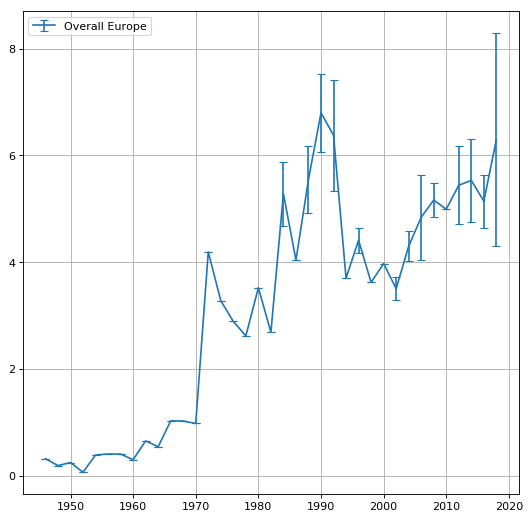

In [38]:
rs_per = '2Y'
alpha = 0.2

#df_sub_set_idx_EU_0 = df_sub_set_idx.loc['1945-01-01':'2020-02-01',['per501','per416_1','per416_2']].resample(rs_per).mean()
#df_sub_set_idx_EU_0_q95 = df_sub_set_idx.loc['1945-01-01':'2020-02-01',['per501','per416_1','per416_2']].resample(rs_per).quantile(q=alpha)


df_sub_set_idx_EU_0 = df_sub_set_idx.loc['1945-01-01':'2020-02-01',['Any_Env']].resample(rs_per).mean()
df_sub_set_idx_EU_0_q95 = df_sub_set_idx.loc['1945-01-01':'2020-02-01',['Any_Env']].resample(rs_per).quantile(q=alpha)

fig = plt.figure(figsize=(8, 8), dpi= 80, facecolor='w', edgecolor='k' )


plt.errorbar(df_sub_set_idx_EU_0.index,
             df_sub_set_idx_EU_0.Any_Env,
             yerr=df_sub_set_idx_EU_0_q95.Any_Env,  # X
             label="Overall Europe",
             capsize = 4)

plt.legend(loc='upper left') #Show legend
plt.grid(True)


### Environmental protection discour in Europe by region

In [41]:
#pd.DataFrame.resample?

# A p-value of less than .05 means that there is less than a 5 percent chance of seeing these results (or more extreme results),
# in the world where the null hypothesis is true.

rs_per = '5Y'
alpha = 0.2


df_sub_set_idx['Any_Env'] = df_sub_set_idx['per501'] + df_sub_set_idx['per416_1']+df_sub_set_idx['per416_2']


df_sub_set_idx_EU_Reg_0 = df_sub_set_idx.loc[df_sub_set_idx['European_Region']==list(Nation_dic_2.keys())[0],['per501','per416_1','per416_2','Any_Env']].resample(rs_per).mean()
df_sub_set_idx_EU_Reg_1 = df_sub_set_idx.loc[df_sub_set_idx['European_Region']==list(Nation_dic_2.keys())[1],['per501','per416_1','per416_2','Any_Env']].resample(rs_per).mean()


df_sub_set_idx_EU_Reg_0_q95 = df_sub_set_idx.loc[df_sub_set_idx['European_Region']==list(Nation_dic_2.keys())[0],['per501','per416_1','per416_2','Any_Env']].resample(rs_per).quantile(q=alpha)
df_sub_set_idx_EU_Reg_1_q95 = df_sub_set_idx.loc[df_sub_set_idx['European_Region']==list(Nation_dic_2.keys())[1],['per501','per416_1','per416_2','Any_Env']].resample(rs_per).quantile(q=alpha)





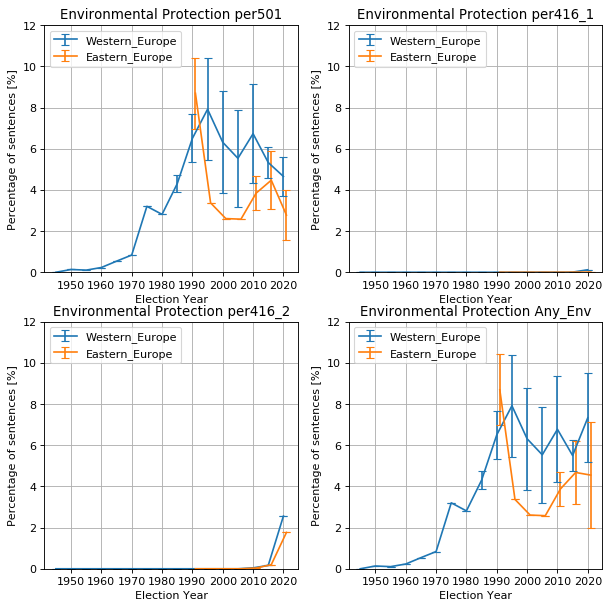

In [42]:
fig = plt.figure(figsize=(9, 9), dpi= 80, facecolor='w', edgecolor='k' )



for k, factor in enumerate(values.keys()):

    plt.subplot(2,2,k+1)
    plt.errorbar(df_sub_set_idx_EU_Reg_0.index,
                 df_sub_set_idx_EU_Reg_0[factor],
                 yerr=df_sub_set_idx_EU_Reg_0_q95[factor],  # X
                 label=list(Nation_dic_2.keys())[0],
                 capsize = 4)

    plt.errorbar(df_sub_set_idx_EU_Reg_1.index,
                 df_sub_set_idx_EU_Reg_1[factor],
                 yerr=df_sub_set_idx_EU_Reg_1_q95[factor],  # X
                 label=list(Nation_dic_2.keys())[1],
                 capsize = 4)

    

    plt.legend(loc='upper left') #Show legend
    plt.grid(True)
    plt.ylim((0,12))

    plt.xlabel("Election Year")
    plt.ylabel("Percentage of sentences [%]")
    plt.title("Environmental Protection " + factor)


plt.show()

In [ ]:
rs_per = '5Y'
alpha = 0.2

df_sub_set_idx['Any_Env'] = df_sub_set_idx['per501'] + df_sub_set_idx['per416_1']+df_sub_set_idx['per416_2']


df_sub_set_idx_EU_Reg_0 = df_sub_set_idx.loc[df_sub_set_idx['European_Region']==list(Nation_dic.keys())[0],['per501','per416_1','per416_2', 'Any_Env']].resample(rs_per).mean()
df_sub_set_idx_EU_Reg_1 = df_sub_set_idx.loc[df_sub_set_idx['European_Region']==list(Nation_dic.keys())[1],['per501','per416_1','per416_2', 'Any_Env']].resample(rs_per).mean()


df_sub_set_idx_EU_Reg_0_q95 = df_sub_set_idx.loc[df_sub_set_idx['European_Region']==list(Nation_dic.keys())[0],['per501','per416_1','per416_2', 'Any_Env']].resample(rs_per).quantile(q=alpha)
df_sub_set_idx_EU_Reg_1_q95 = df_sub_set_idx.loc[df_sub_set_idx['European_Region']==list(Nation_dic.keys())[1],['per501','per416_1','per416_2', 'Any_Env']].resample(rs_per).quantile(q=alpha)
df_sub_set_idx_EU_Reg_2_q95 = df_sub_set_idx.loc[df_sub_set_idx['European_Region']==list(Nation_dic.keys())[2],['per501','per416_1','per416_2', 'Any_Env']].resample(rs_per).quantile(q=alpha)
df_sub_set_idx_EU_Reg_3_q95 = df_sub_set_idx.loc[df_sub_set_idx['European_Region']==list(Nation_dic.keys())[3],['per501','per416_1','per416_2', 'Any_Env']].resample(rs_per).quantile(q=alpha)


In [ ]:
#pd.DataFrame.resample?

# A p-value of less than .05 means that there is less than a 5 percent chance of seeing these results (or more extreme results),
# in the world where the null hypothesis is true.

rs_per = '5Y'
alpha = 0.2


df_sub_set_idx_party_aff_0 = df_sub_set_idx.loc[df_sub_set_idx['political_affiliation']==list(Party_dic.keys())[0],['per501','per416_1','per416_2', 'Any_Env']].resample(rs_per,label='left').mean()
df_sub_set_idx_party_aff_1 = df_sub_set_idx.loc[df_sub_set_idx['political_affiliation']==list(Party_dic.keys())[1],['per501','per416_1','per416_2', 'Any_Env']].resample(rs_per,label='left').mean()
df_sub_set_idx_party_aff_2 = df_sub_set_idx.loc[df_sub_set_idx['political_affiliation']==list(Party_dic.keys())[2],['per501','per416_1','per416_2', 'Any_Env']].resample(rs_per,label='left').mean()


df_sub_set_idx_party_aff_0_q95 = df_sub_set_idx.loc[df_sub_set_idx['political_affiliation']==list(Party_dic.keys())[0],['per501','per416_1','per416_2', 'Any_Env']].resample(rs_per,label='left').quantile(q=alpha)
df_sub_set_idx_party_aff_1_q95 = df_sub_set_idx.loc[df_sub_set_idx['political_affiliation']==list(Party_dic.keys())[1],['per501','per416_1','per416_2', 'Any_Env']].resample(rs_per,label='left').quantile(q=alpha)
df_sub_set_idx_party_aff_2_q95 = df_sub_set_idx.loc[df_sub_set_idx['political_affiliation']==list(Party_dic.keys())[2],['per501','per416_1','per416_2', 'Any_Env']].resample(rs_per,label='left').quantile(q=alpha)





In [ ]:
plt.figure(figsize=(8, 6), dpi= 80, facecolor='w', edgecolor='k')

for k, factor in enumerate(values.keys()):

    plt.subplot(2,2,k+1)

    plt.errorbar(df_sub_set_idx_party_aff_0.index,
                 df_sub_set_idx_party_aff_0[factor],
                 yerr=df_sub_set_idx_party_aff_0_q95[factor],  # X
                 label=list(Party_dic.keys())[0],
                 capsize = 4)

    plt.errorbar(df_sub_set_idx_party_aff_1.index,
                 df_sub_set_idx_party_aff_1[factor],
                 yerr=df_sub_set_idx_party_aff_1_q95[factor],  # X
                 label=list(Party_dic.keys())[1],
                 capsize = 4)
    
    plt.errorbar(df_sub_set_idx_party_aff_2.index,
             df_sub_set_idx_party_aff_2[factor],
             yerr=df_sub_set_idx_party_aff_2_q95[factor],  # X
             label=list(Party_dic.keys())[2],
             capsize = 4)


    plt.title('Environmental Protection '+ factor)
    plt.xlabel("Election Year")
    plt.ylabel("Percentage of sentences [%]")
    
    plt.xlim('1945-01-01','2020-02-01')     # set the xlim to left, right)
             
    plt.legend(loc='upper left') #Show legend
    plt.grid(True)


plt.show()

### Political Orientation and Environmental protection discour in Europe

## Next Steps

### 1. Anova on party Political Orientation and Environmental protection discour in Europe


### 4. unsupervised machine learnign on the trends (k means / nearest neighnough)

### 5. Orientamento politico per regione europea

### 6. Togliere dal gruppo left-wing la parola ecological. Per vedere se la sinistra tradizionale (meno quella ecologista) si è interessata alla questione

http://www.parlgov.org/

In [ ]:
#%load_ext signature
%matplotlib inline

#Hack to fix missing PROJ4 env var
import os
import conda

os.environ['PROJ_LIB'] = "C:/ProgramData/Anaconda3/pkgs/proj4-5.2.0-h6538335_1006/Library/share/"

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#from geonamescache import GeonamesCache
#from helpers import slug
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

#import mpl_toolkits.basemap as Basemap

from mpl_toolkits.basemap import Basemap

mpl.style.use('classic')
fig = plt.figure(figsize=(22, 12))

#ax = fig.add_subplot(111, axisbg='w', frame_on=False)
fig.suptitle('Forest area as percentage of land area in {}'.format('2018'), fontsize=30, y=.95)

m = Basemap(lon_0=0, projection='robin')
m.drawmapboundary(color='w')

m.readshapefile(shapefile, 'units', color='#444444', linewidth=.2)




# Cover up Antarctica so legend can be placed over it.
ax.axhspan(0, 1000 * 1800, facecolor='w', edgecolor='w', zorder=2)

# Draw color legend.
ax_legend = fig.add_axes([0.35, 0.14, 0.3, 0.03], zorder=3)
cmap = mpl.colors.ListedColormap(scheme)
cb = mpl.colorbar.ColorbarBase(ax_legend, cmap=cmap, ticks=bins, boundaries=bins, orientation='horizontal')
cb.ax.set_xticklabels([str(round(i, 1)) for i in bins])

# Set the map footer.
plt.annotate(description, xy=(-.8, -3.2), size=14, xycoords='axes fraction')

plt.savefig(imgfile, bbox_inches='tight', pad_inches=.2)



#%load_ext signature
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
#Hack to fix missing PROJ4 env var
import os
os.environ['PROJ_LIB'] = "C:/ProgramData/Anaconda3/pkgs/proj4-5.2.0-h6538335_1006/Library/share/"
#import mpl_toolkits.basemap as Basemap
from mpl_toolkits.basemap import Basemap

m = Basemap(resolution='i',
            projection='merc', llcrnrlat=y1,urcrnrlat=y2,llcrnrlon=x1,urcrnrlon=x2,lat_ts=(x1+x2)/2)

m.drawcountries(linewidth=0.5)
m.drawcoastlines(linewidth=0.5)
m.drawparallels(np.arange(y1,y2,2.),labels=[1,0,0,0],color='black',dashes=[1,0],labelstyle='+/-',linewidth=0.2) # draw parallels
m.drawmeridians(np.arange(x1,x2,2.),labels=[0,0,0,1],color='black',dashes=[1,0],labelstyle='+/-',linewidth=0.2) # draw meridians




plt.show()